In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija


In [4]:
train_data = pd.read_csv('train_data_tfidf.csv')

In [5]:
test_data = pd.read_csv('test_data_tfidf.csv')

In [6]:
X_train = train_data.iloc[:, :-3].copy()
y_train = train_data.iloc[:, -3:].copy()
X_test = test_data.iloc[:, :-3].copy()
y_test = test_data.iloc[:, -3:].copy()

In [7]:
y_train['svm'] = y_train.iloc[:,:].apply(
    lambda x: ", ".join(x.astype(str)), axis=1)
y_train.drop(['Topic_Biology', 'Topic_Chemistry', 'Topic_Physics'], axis=1, inplace=True)
y_train['svm'] = y_train['svm'].apply(eval).apply(np.argmax)

#Support Vector Machines

normalizacija tf idf matrice nije neophodna

In [8]:
y_train = y_train['svm'].values.ravel()

In [25]:
'''
mrzi me da cekam

#svm = SVC(decision_function_shape='ovr')
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
'''

"\nmrzi me da cekam\n\n#svm = SVC(decision_function_shape='ovr')\nparam_grid = {\n    'C': [0.1, 1, 10],\n    'kernel': ['rbf'],\n    'gamma': [0.1, 1, 10]\n}\n\ngrid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\nbest_score = grid_search.best_score_\n"

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
pca = PCA(n_components=500, svd_solver='full')  # Use the original number of features as the maximum number of components

X_pca = pca.fit_transform(X_train)

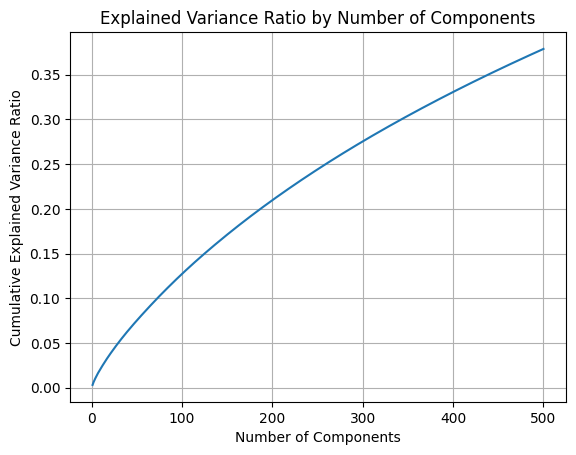

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [ ]:
#jako malo 35%, treba da bude vece od 90%

In [12]:
pca = PCA(n_components=5000, svd_solver='full')  # Use the original number of features as the maximum number of components

X_pca = pca.fit_transform(X_train)

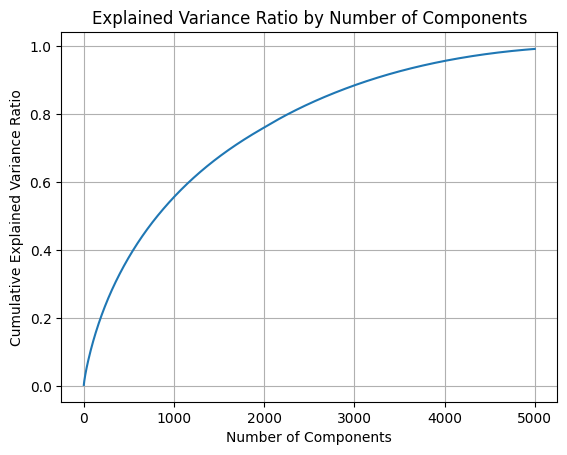

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [15]:
X_val = pca.transform(X_val)

In [14]:
svm = SVC()

svm.fit(X_pca, y_train)

SVC()

In [16]:
y_pred = svm.predict(X_val)

In [17]:
#prvi model, nikakvo namestanje parametara one vs one
accuracy_score(y_val, y_pred)

0.6668649613325401

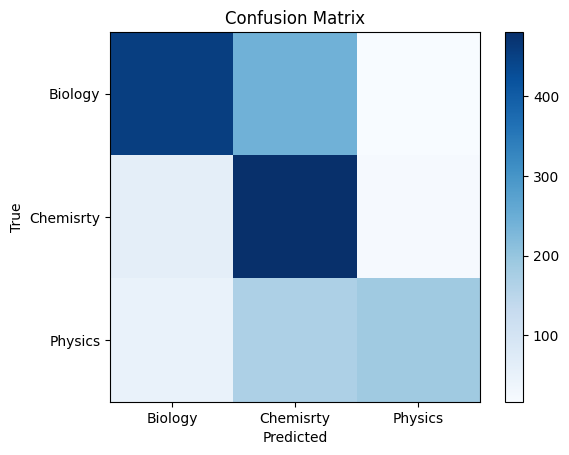

In [21]:
cm = confusion_matrix(y_val, y_pred)

class_labels = ['Biology', 'Chemisrty', 'Physics']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7214414444112394
Recall: 0.6650803093396788
Confusion matrix: 
[[431 259  23]
 [ 53 482  28]
 [ 39 161 205]]


In [26]:
svm = SVC(C=10.0)

svm.fit(X_pca, y_train)

SVC(C=10.0)

In [27]:
y_pred = svm.predict(X_val)

In [28]:
# drugi model, C=10.0 da bi pravio striktnije granice
accuracy_score(y_val, y_pred)

0.6650803093396788

In [36]:
# ovaj jos gori lmao

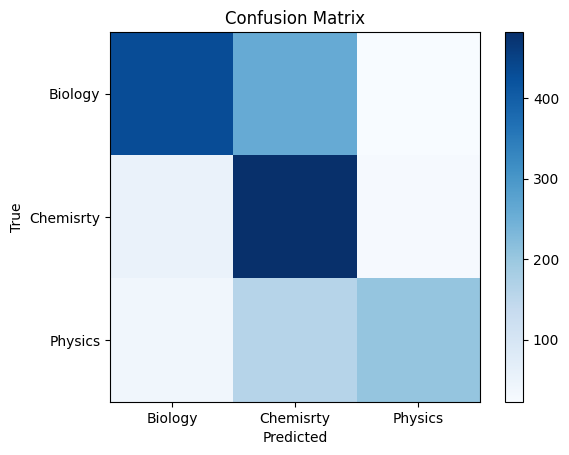

In [33]:
cm1 = cm
cm = confusion_matrix(y_val, y_pred)

class_labels = ['Biology', 'Chemisrty', 'Physics']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
print("first: ")
print(cm1)
print("-----------------------------")
print("second: ")
print(cm)

first: 
[[431 259  23]
 [ 53 482  28]
 [ 39 161 205]]
-----------------------------
second: 
[[431 259  23]
 [ 53 482  28]
 [ 39 161 205]]


In [35]:
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7214414444112394
Recall: 0.6650803093396788


In [37]:
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(X_pca, y_train)


SVC(decision_function_shape='ovo')

In [ ]:
y_pred = svm_ovo.predict(X_val)